In [1]:
import pandas as pd

## Explore Data

In [3]:
data=pd.read_csv(r"E:\data_projects\Ford Car Price Prediction\ford.csv")

In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
data.shape

(17966, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
data.duplicated().sum()

154

In [10]:
data=data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(17812, 9)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

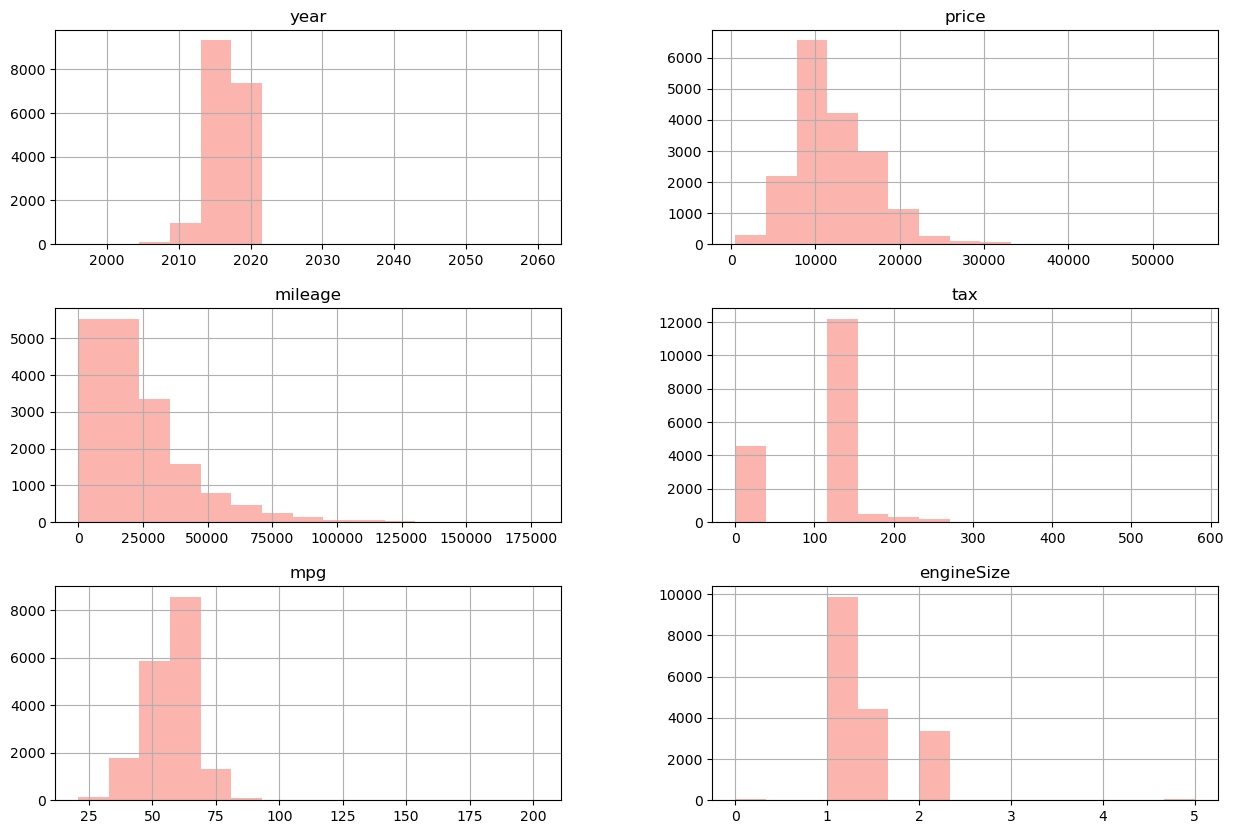

In [15]:
sns.set_palette("Pastel1")
data.hist(bins=15,figsize=(15,10))
plt.show()

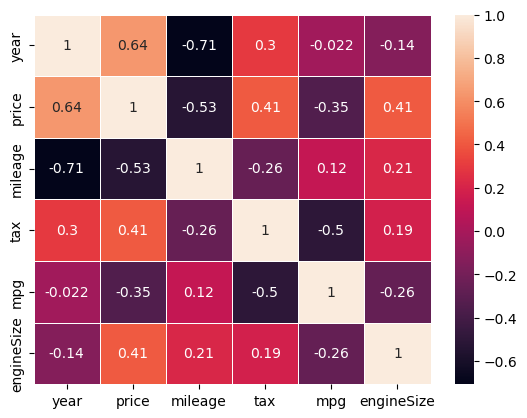

In [16]:
sns.set_palette("coolwarm")
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,linewidth=0.5)
plt.show()

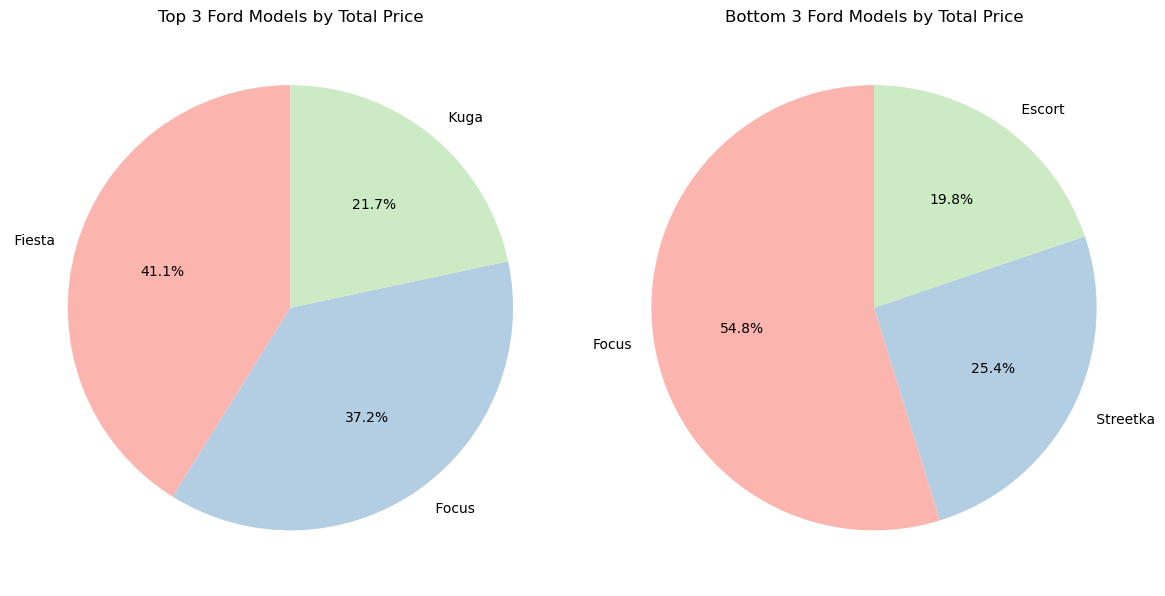

In [17]:
sns.set_palette("Pastel1")
model_price = data.groupby("model")["price"].sum().sort_values(ascending=False)
top3 = model_price.head(3)
bottom3 = model_price.tail(3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(top3.values, labels=top3.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Top 3 Ford Models by Total Price')
axes[1].pie(bottom3.values, labels=bottom3.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Bottom 3 Ford Models by Total Price')
plt.tight_layout()
plt.show()

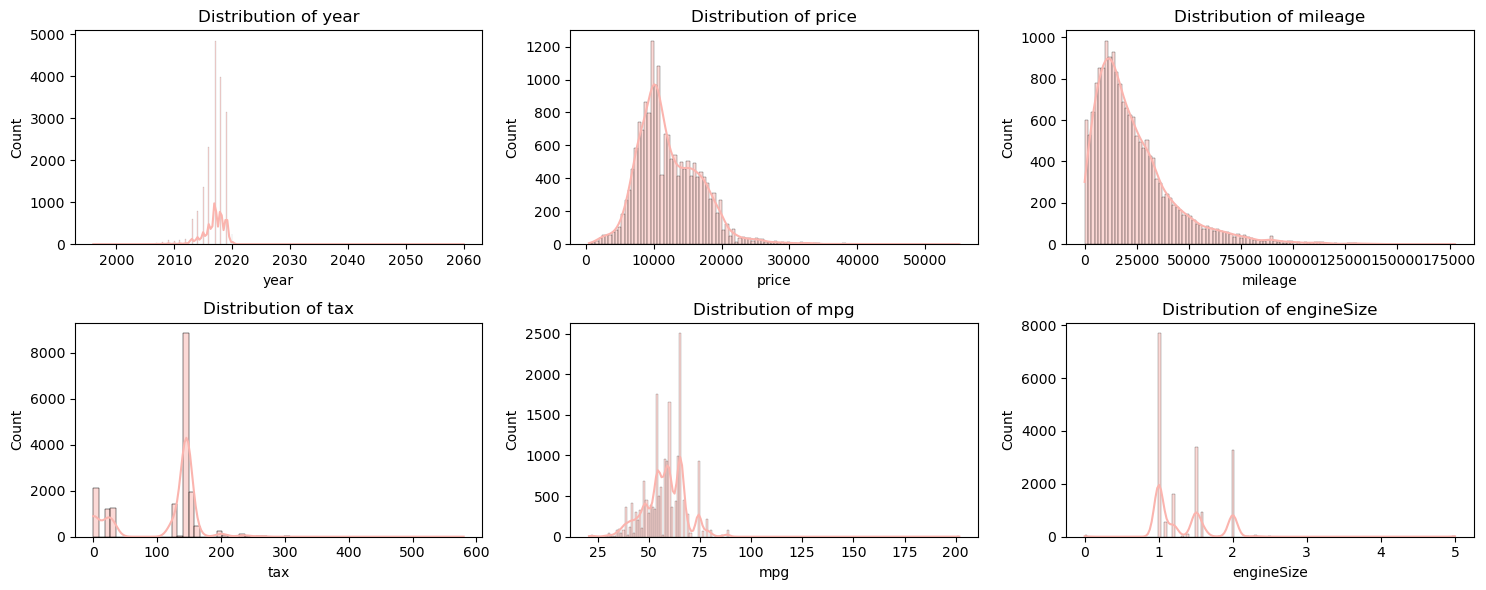

In [18]:
numeric_columns=data.select_dtypes(exclude="object")
sns.set_palette("Pastel1")
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

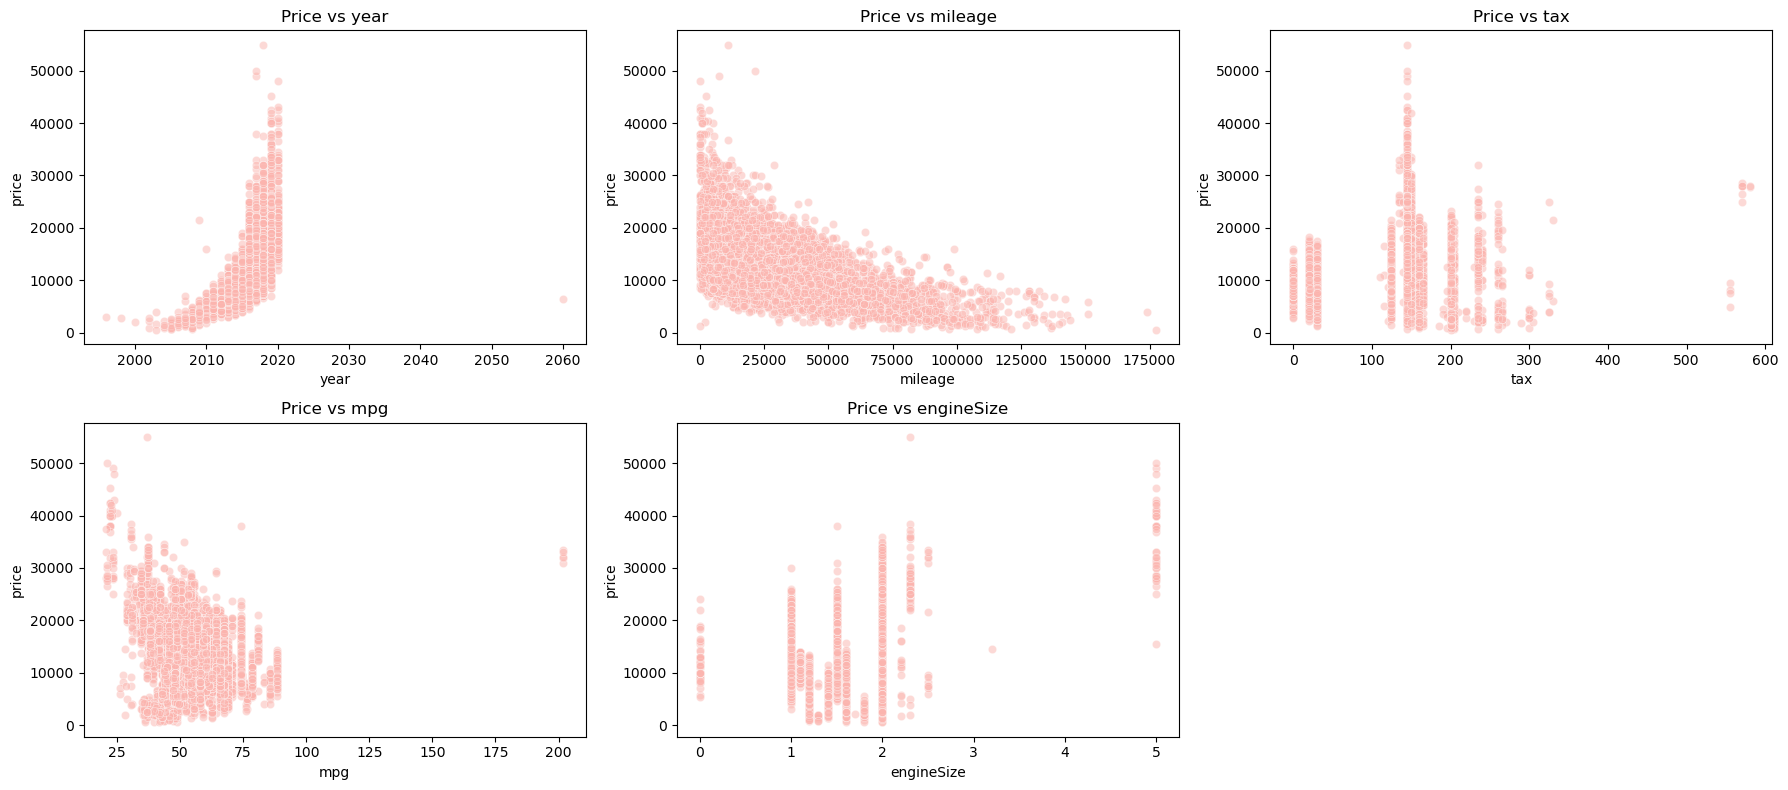

In [19]:
numeric_columns=["year","mileage","tax","mpg","engineSize"]
plt.figure(figsize=(18, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs {col}', fontsize=12)
plt.tight_layout()
plt.show()

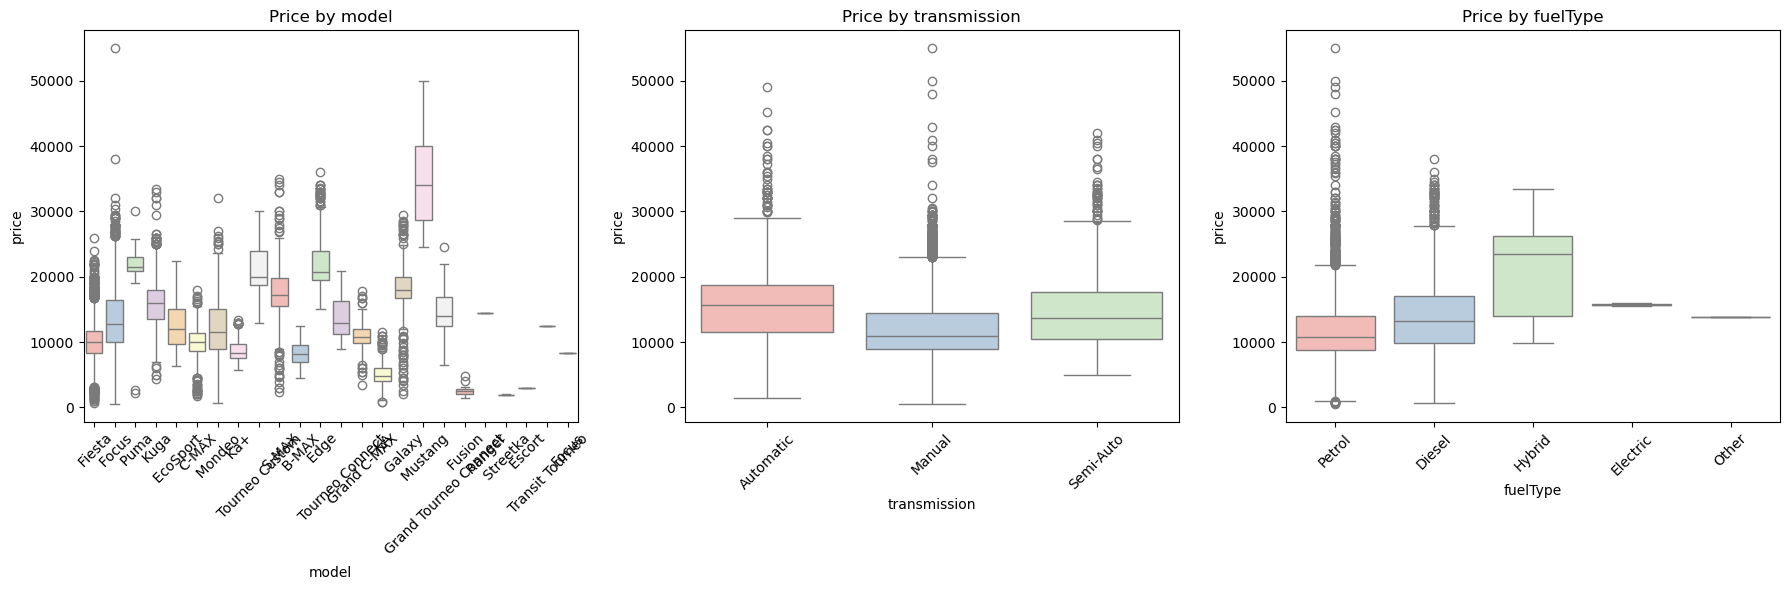

In [20]:
categorical_columns=data.select_dtypes("object")
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=col, y='price', hue=col, palette='Pastel1', legend=False)
    plt.title(f'Price by {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Processing

In [22]:
#check outlier
data_numeric=data.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")
    if outlier>0:
        data=data.loc[(data[col]<=upper_bound) & (data[col]>=lower_bound)]

Total Outliers in year are 498-2.8%
Total Outliers in price are 284-1.59%
Total Outliers in mileage are 969-5.44%
Total Outliers in tax are 5129-28.8%
Total Outliers in mpg are 731-4.1%
Total Outliers in engineSize are 190-1.07%


In [23]:
data_numeric=data.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")

Total Outliers in year are 96-0.82%
Total Outliers in price are 0-0.0%
Total Outliers in mileage are 289-2.47%
Total Outliers in tax are 3526-30.09%
Total Outliers in mpg are 0-0.0%
Total Outliers in engineSize are 0-0.0%


In [24]:
Q1 = data["mileage"].quantile(0.25)
Q3 = data["mileage"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_mileage = data["mileage"].median()
outlier_mask = (data["mileage"] < lower_bound) | (data["mileage"] > upper_bound)
data.loc[outlier_mask, "mileage"] = median_mileage

In [25]:
data_numeric=data.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")

Total Outliers in year are 96-0.82%
Total Outliers in price are 0-0.0%
Total Outliers in mileage are 121-1.03%
Total Outliers in tax are 3526-30.09%
Total Outliers in mpg are 0-0.0%
Total Outliers in engineSize are 0-0.0%


In [26]:
categorical_columns=data.select_dtypes("object")
for col in categorical_columns:
    print(data[col].value_counts())

model
Fiesta                   4255
Focus                    2862
Kuga                     1743
EcoSport                 1050
Ka+                       470
Mondeo                    213
S-MAX                     213
B-MAX                     181
Galaxy                    181
C-MAX                     166
Edge                      127
Grand C-MAX                81
Puma                       72
Grand Tourneo Connect      41
KA                         26
Tourneo Connect            21
Tourneo Custom             15
Name: count, dtype: int64
transmission
Manual       9966
Automatic     904
Semi-Auto     847
Name: count, dtype: int64
fuelType
Petrol    8546
Diesel    3166
Hybrid       5
Name: count, dtype: int64


In [27]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [28]:
data.duplicated().sum()

8

In [29]:
data=data.drop_duplicates()

In [30]:
data.duplicated().sum()

0

In [31]:
from sklearn.preprocessing import LabelEncoder

## Data Transformation

In [33]:
data = pd.get_dummies(data, columns=['transmission', 'fuelType'], drop_first=True)
le = LabelEncoder()
data['model'] = le.fit_transform(data['model'])

In [34]:
data.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,4,2017,12000,15944,150,57.7,1.0,False,False,False,True
1,5,2018,14000,9083,150,57.7,1.0,True,False,False,True
2,5,2017,13000,12456,150,57.7,1.0,True,False,False,True
3,4,2019,17500,10460,145,40.3,1.5,True,False,False,True
4,4,2019,16500,1482,145,48.7,1.0,False,False,False,True


In [35]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [36]:
data.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,4,2017,12000,15944,150,57.7,1.0,0,0,0,1
1,5,2018,14000,9083,150,57.7,1.0,1,0,0,1
2,5,2017,13000,12456,150,57.7,1.0,1,0,0,1
3,4,2019,17500,10460,145,40.3,1.5,1,0,0,1
4,4,2019,16500,1482,145,48.7,1.0,0,0,0,1


In [37]:
data.dtypes

model                       int32
year                        int64
price                       int64
mileage                     int64
tax                         int64
mpg                       float64
engineSize                float64
transmission_Manual         int32
transmission_Semi-Auto      int32
fuelType_Hybrid             int32
fuelType_Petrol             int32
dtype: object

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Modeling

In [40]:
X = data.drop(columns='price')
y = data['price']

#### Linear Regression Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
y_pred_lr = LinearRegressionModel.predict(X_test)

print("Linear Regression : ")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}\n")

Linear Regression : 
R²: 0.6710
MSE: 4791404.45
MAE: 1704.19



#### Random Forest  Model

In [44]:
RandomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForestModel.fit(X_train, y_train)
y_pred_rf = RandomForestModel.predict(X_test)

print("Random Forest : ")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}\n")

Random Forest : 
R²: 0.8882
MSE: 1628499.80
MAE: 927.04



#### Gradient Boosting Model

In [46]:
GradientBoostingModel = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
GradientBoostingModel.fit(X_train, y_train)
y_pred_gb = GradientBoostingModel.predict(X_test)

print("Gradient Boosting : ")
print(f"R²: {r2_score(y_test, y_pred_gb):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}\n")

Gradient Boosting : 
R²: 0.9064
MSE: 1362440.42
MAE: 857.81



#### XGBRegressor Model

In [48]:
XGBModel = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
XGBModel.fit(X_train, y_train)
y_pred_xgb = XGBModel.predict(X_test)

print("XGBoost Regressor : ")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}\n")

XGBoost Regressor : 
R²: 0.9069
MSE: 1356347.69
MAE: 857.06

